## 1.1 K-means clustering and Expectation Maximization (35 points)

- Implement K-means clustering algorithm using only the numpy library.
You can use opencv and matplotlib libraries only to read and display
images but not for clustering. Apply k-means to the provided image with
K=2 and K=3. Display the resulting segmented images for 10 iterations
in both cases. (10 points)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread("home.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
# '''
# Function: PixelIntensity
# Description: Function to compute Pixel intensity in RGB of an image.
# Arguments:  inImg - Input image
#             featureSpace - Output feature space for computed pixel intensities
# Return: None
# '''
# def PixelIntensity(inImg, featureSpace):
    
#     # Create featureSpace
#     features = np.zeros((255,255,255))
    
#     # Iterate over pixels in image
#     for y in range(inImg.shape[0]):
#         for x in range(inImg.shape[1]):
#             # Access pixel at (y,x)
#             pixel = img[y][x]       

In [12]:

#imgList = img.reshape((img.shape[0] * img.shape[1], 3))

# Define number of clusters
k=3

# KMeans function
def KMeans_segmentation(inImg, clusterNum):
    
    # Copy input image
    outImg = inImg.copy()  
    # reshape the image to be a list of pixels with depth 3
    inList = inImg.reshape((inImg.shape[0]* inImg.shape[1]),3)

    super_pix_list = []
    for y in range(inImg.shape[0]):
        for x in range(inImg.shape[1]):
            super_pix = [y,x,inImg[y][x][0],inImg[y][x][1],inImg[y][x][2]]
            super_pix_list.append(super_pix)
    
    # Define Centroids array
    centroids = [None] * clusterNum
    
    # Pick random Points in list to act as cluster centers and store them in centroids
    for i in range(clusterNum):
        posit = np.random.randint(1, len(super_pix_list)+1)
        centroids[i] = super_pix_list[posit]
    
    # Measure euclidian distance for each of the pixels in the image and assign them to a centroid
    # Repeat this loop 10 times
    for num in range(10):
        # Create 2D list of points associated to each centroid
        # Define list of pixels
        listOfPixels = []
        for center in centroids:
            centerList = []
            listOfPixels.append(centerList)
            
        for pixelVal in super_pix_list:
            distance = []
            for i in range(clusterNum):
                distance.append(0)
            pixelRGB = np.array([pixelVal[2],pixelVal[3],pixelVal[4]])
            
            # Compute distance of pixel to each centroid
            for i in range(clusterNum):
                centroidsRGB = np.array([centroids[i][2], centroids[i][3], centroids[i][4]])
                rSSD = float(pixelRGB[0]) - centroidsRGB[0]
                gSSD = float(pixelRGB[1]) - centroidsRGB[1]
                bSSD = float(pixelRGB[2]) - centroidsRGB[2]
                measured_dist = (rSSD*rSSD + gSSD*gSSD + bSSD*bSSD)
                distance[i] = measured_dist
            
            # Find minimum distance in distance list
            min_dist = distance[0]
            closest_center = 0
            for i in range(clusterNum):
                if(distance[i] < min_dist):
                    min_dist = distance[i]
                    closest_center = i
            # Append pixel to closest center list
            listOfPixels[closest_center].append(pixelVal)

        # Select new centers for each list of points associated to a center
        # For every list, first compute 1st SSD
        RGB_Mean = []
        for i in range(clusterNum):
            RGB_Mean.append([0,0,0])
        
        # Compute Mean R,G and B values for each cluster
        for i in range(clusterNum):
            # For each cluster, compute mean of R,G,B values and store in RGB_Mean
            running_sum_r = 0
            running_sum_g = 0
            running_sum_b = 0
            for w in range(len(listOfPixels[i])):
                running_sum_r += listOfPixels[i][w][2]
                running_sum_g += listOfPixels[i][w][3]
                running_sum_b += listOfPixels[i][w][4]
            
            RGB_Mean[i][0] = (running_sum_r/len(listOfPixels[i]))
            RGB_Mean[i][1] = (running_sum_g/len(listOfPixels[i]))
            RGB_Mean[i][2] = (running_sum_b/len(listOfPixels[i]))
        
        # Then, compute SSD b/w other pixels and mean. Minimize that distance
        # in order to find closest pixel to the mean of the cluster
        SSD = []
        computed_ssd = []
        for i in range(clusterNum):
            SSD.append(0)
            computed_ssd.append(0)
        
        # Compute 1st SSD from first pixel for each cluster to set benchmark
        for i in range(clusterNum):
            potential_cent = listOfPixels[i][0]
            rSSD = (potential_cent[2]) - RGB_Mean[i][0]
            gSSD = (potential_cent[3]) - RGB_Mean[i][1]
            bSSD = (potential_cent[4]) - RGB_Mean[i][2]
            SSD[i] = (rSSD*rSSD + gSSD*gSSD + bSSD*bSSD)
            centroids[i] = potential_cent
        
        for i in range(clusterNum):
            
            for w in range(len(listOfPixels[i])):
                potential_centroid = listOfPixels[i][w]
                # Compute SSD from potential new center
                rSSD = (potential_centroid[2]) - RGB_Mean[i][0]
                gSSD = (potential_centroid[3]) - RGB_Mean[i][1]
                bSSD = (potential_centroid[4]) - RGB_Mean[i][2]
                point_ssd = (rSSD*rSSD + gSSD*gSSD + bSSD*bSSD)
                
                if(point_ssd < SSD[i]):
                    SSD[i] = point_ssd
                    centroids[i] = potential_centroid
            
    # After finding final center points and list associated to each center point, make final image
    # Assign pixels associated to the center the value of the center
    # Copy initial image to get correct dimensions
    outImage = inImg.copy()
    for i in range(clusterNum):
        for j in range(len(listOfPixels[i])):
            pixel = listOfPixels[i][j]
            row_pos = pixel[0]
            col_pos = pixel[1]
            resulting_pixel = np.array([centroids[i][2],centroids[i][3],centroids[i][4]])
            outImage[row_pos][col_pos] = resulting_pixel
    
    outImage = np.uint8(outImage)
    return outImage
    
    
# segmented_image = img.copy()
# segmented_image2 = np.zeros(img.shape)
#print(img[0][0])

segmented_image = KMeans_segmentation(img,2)
segmented_image2 = KMeans_segmentation(img,3)
segmented_image3 = KMeans_segmentation(img,20)



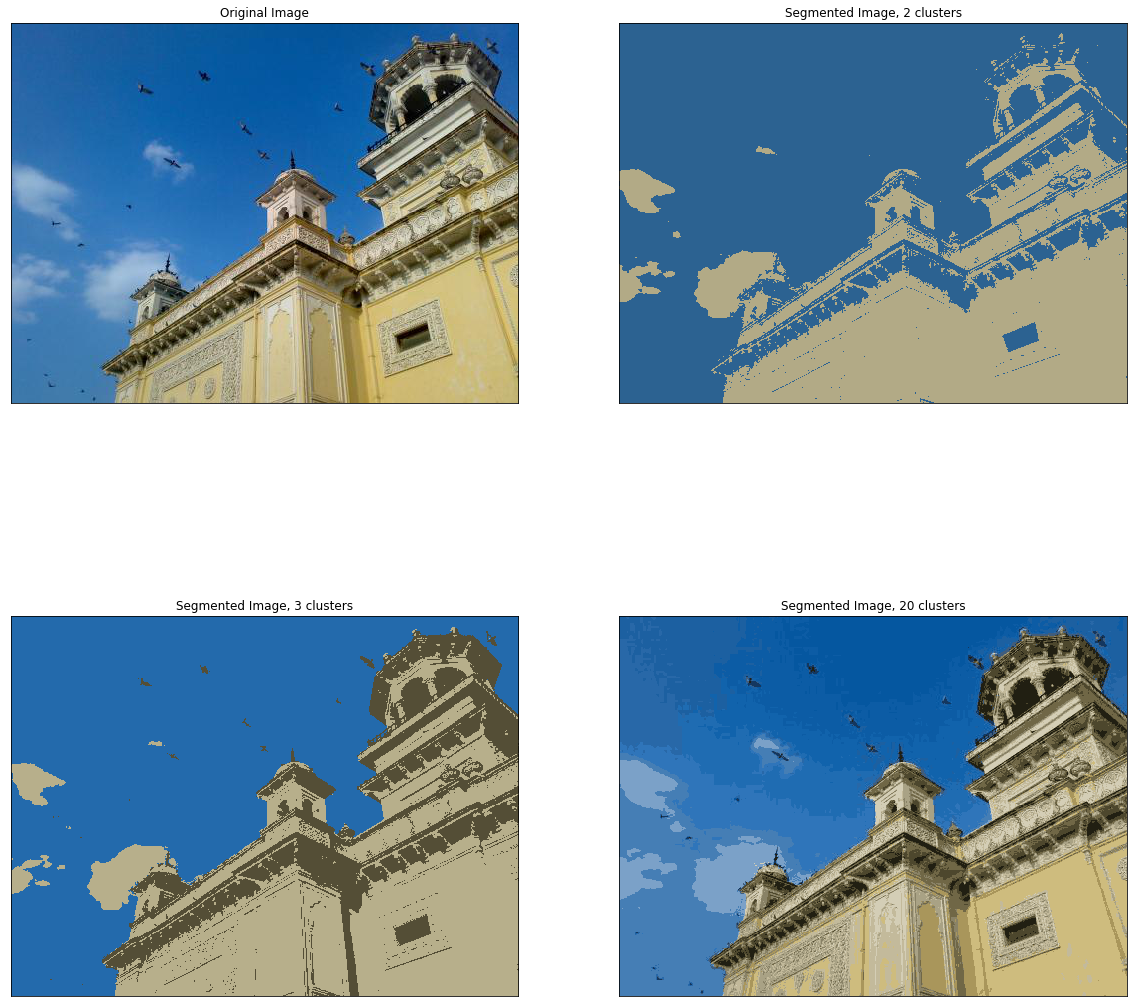

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1), plt.imshow(img)
plt.title("Original Image")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2), plt.imshow(segmented_image)
plt.title("Segmented Image, 2 clusters")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3), plt.imshow(segmented_image2)
plt.title("Segmented Image, 3 clusters")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(segmented_image3)
plt.title("Segmented Image, 20 clusters")
plt.xticks([]),plt.yticks([])
plt.show()

- Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images. Apply it to the given image with 2 and 3 Gaussian components. Display the resulting segmented images for 10 iterations in both cases. (20 points)